<a href="https://colab.research.google.com/github/rodrigorhp/Reto-Topolog-a-g.400-eq3/blob/main/Reto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Train y Validation

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/gender_submission.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test['Survived'] = df_val['Survived']

In [ ]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [ ]:
df_train = df_train[df_train['Embarked'].notna()]
df_test = df_test[df_test['Embarked'].notna()]

In [ ]:
df_train=df_train.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1)
df_test=df_test.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1)

In [ ]:
from sklearn import preprocessing
leSex = preprocessing.LabelEncoder()
leSex.fit(df_train['Sex'].unique().tolist())
leEmb = preprocessing.LabelEncoder()
leEmb.fit(df_train['Embarked'].unique().tolist())

LabelEncoder()

In [ ]:
leSex_1 = preprocessing.LabelEncoder()
leSex_1.fit(df_test['Sex'].unique().tolist())
leEmb_1 = preprocessing.LabelEncoder()
leEmb_1.fit(df_test['Embarked'].unique().tolist())

LabelEncoder()

In [ ]:
df_train['Sex'] = leSex.transform(df_train['Sex'])
df_train['Embarked'] = leEmb.transform(df_train['Embarked'])

In [ ]:
df_test['Sex'] = leSex_1.transform(df_test['Sex'])
df_test['Embarked'] = leEmb_1.transform(df_test['Embarked'])

In [ ]:
df_train['Age'].fillna(df_train['Age'].median(),inplace = True)
df_test['Age'].fillna(df_test['Age'].median(),inplace = True)

In [ ]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [ ]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,1


In [ ]:
df_test = df_test.dropna()

## Sets de Entrenamiento y Validación

In [ ]:
#from sklearn.model_selection import train_test_split

X_train = df_train.drop(['Survived'], axis = 1) 
y_train = df_train['Survived']   

X_test = df_test.drop(['Survived'], axis = 1) 
y_test = df_test['Survived']    

                             
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

# K neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.80      0.76       265
           1       0.56      0.43      0.49       152

    accuracy                           0.67       417
   macro avg       0.64      0.62      0.62       417
weighted avg       0.66      0.67      0.66       417



In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6690647482014388


In [ ]:
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))

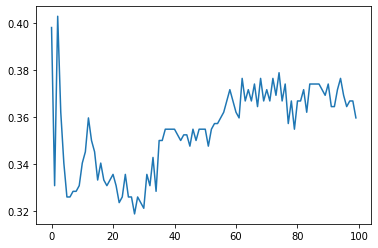

In [ ]:
plt.plot(error_rates)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 28)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6810551558752997


# K means

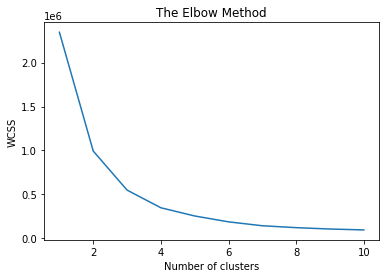

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_pred = kmeans.fit_predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_kmeans_pred)

array([[ 14, 535],
       [ 39, 301]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, y_kmeans_pred))

Accuracy: 0.3543307086614173


### Modelo Sex, Fare, Class

In [ ]:
X_train_1 = X_train.drop(['Embarked','Parch','SibSp','Age'],axis = 1)

In [ ]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2_pred = kmeans2.fit_predict(X_train_1)

In [ ]:
df_3 = X_train_1.values

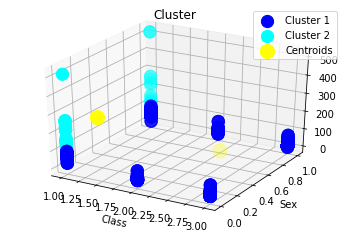

In [ ]:
# Creamos la figura
fig = plt.figure()

# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

col = ['cyan','green','blue']
#Agregamos los puntos
for i in range(0,2):
  x = df_3[y_kmeans2_pred == i, 0]
  y = df_3[y_kmeans2_pred == i, 1]
  z = df_3[y_kmeans2_pred == i, 2]
  clasi = 'Cluster '+str(i+1)
  ax1.scatter(x, y, z, c = col[i-1], s = 150,label = clasi)

# Agregamos los centros
x = kmeans2.cluster_centers_[:, 0]
y = kmeans2.cluster_centers_[:, 1]
z = kmeans2.cluster_centers_[:, 2]
ax1.scatter(x, y, z, c = 'yellow', s = 200, label = 'Centroids')

plt.rcParams["figure.figsize"] = (15,12)
plt.title('Cluster')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Sex')

plt.show()

In [ ]:
confusion_matrix(y_train, y_kmeans2_pred)

array([[535,  14],
       [301,  39]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, y_kmeans2_pred))

Accuracy: 0.6456692913385826


### Modelo Age y Fare

In [ ]:
X_train_2 = X_train[['Age','Fare']]

In [ ]:
X_train_2 = X_train_2.values

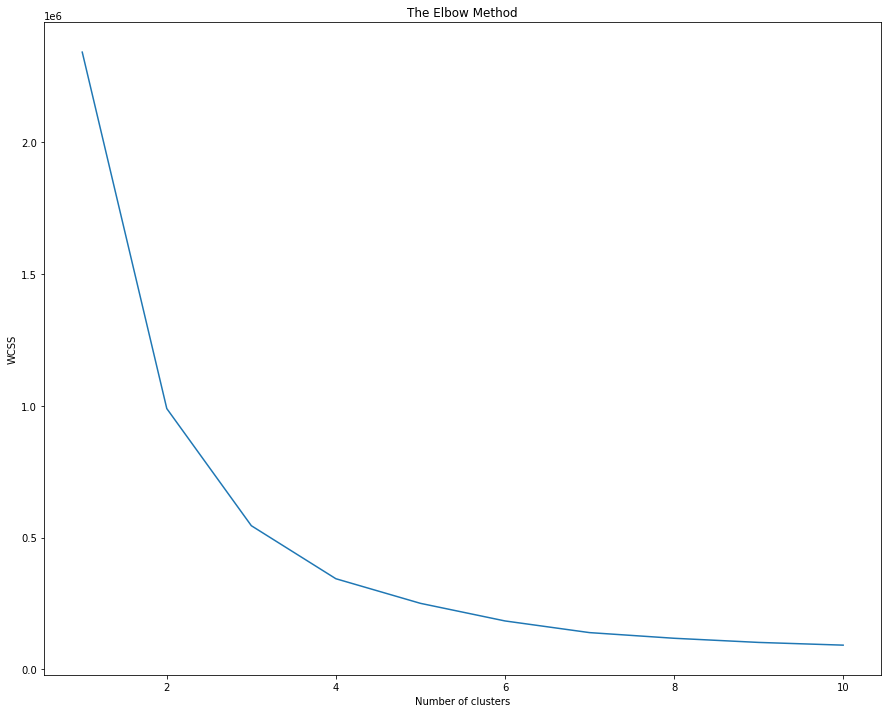

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_2.fit(X_train_2)
    wcss.append(kmeans_2.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans3_pred = kmeans3.fit_predict(X_train_2)

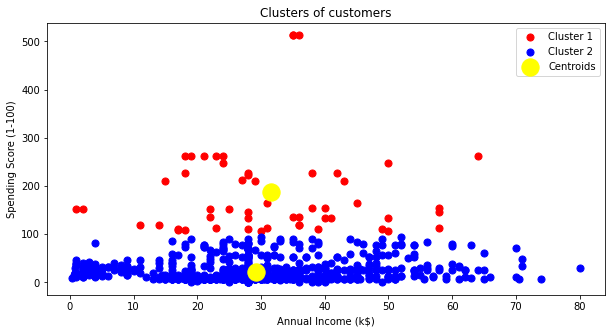

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_train_2[y_kmeans3_pred == 0, 0], X_train_2[y_kmeans3_pred == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_train_2[y_kmeans3_pred == 1, 0], X_train_2[y_kmeans3_pred == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
#plt.scatter(df_2[y_kmeans2 == 2, 0], df_2[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(df_2[y_kmeans2 == 3, 0], df_2[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
confusion_matrix(y_train, y_kmeans3_pred)

array([[ 14, 535],
       [ 39, 301]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, y_kmeans3_pred))

Accuracy: 0.3543307086614173


# Decision Tree

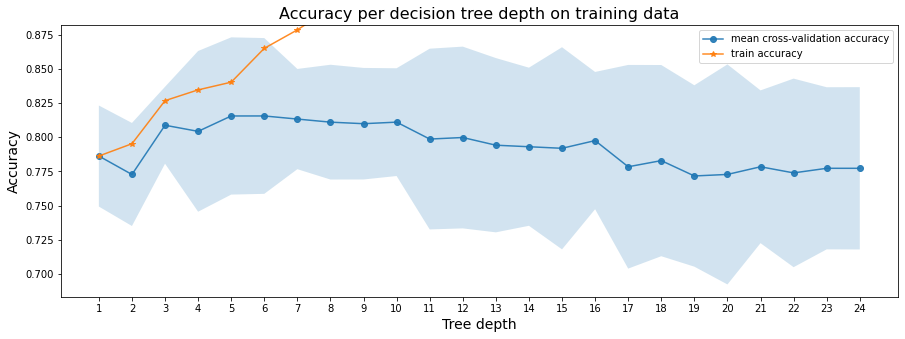

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



### Modelo 1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

start_time = datetime.now()
clf = DecisionTreeClassifier(max_depth = 5,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

end_time = datetime.now()

tiempo = end_time-start_time

print(classification_report(y_test, y_pred))
print(tiempo)

Accuracy: 0.9568345323741008
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       265
           1       0.95      0.93      0.94       152

    accuracy                           0.96       417
   macro avg       0.96      0.95      0.95       417
weighted avg       0.96      0.96      0.96       417

0:00:00.023951


In [ ]:
y_test_1 = y_test.to_list()

In [ ]:
for i in range(len(y_pred)):
  print('Real: ',y_test_1[i],' | Pred: ', y_pred[i])

Real:  0  | Pred:  0
Real:  1  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | P

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[258,   7],
       [ 11, 141]])

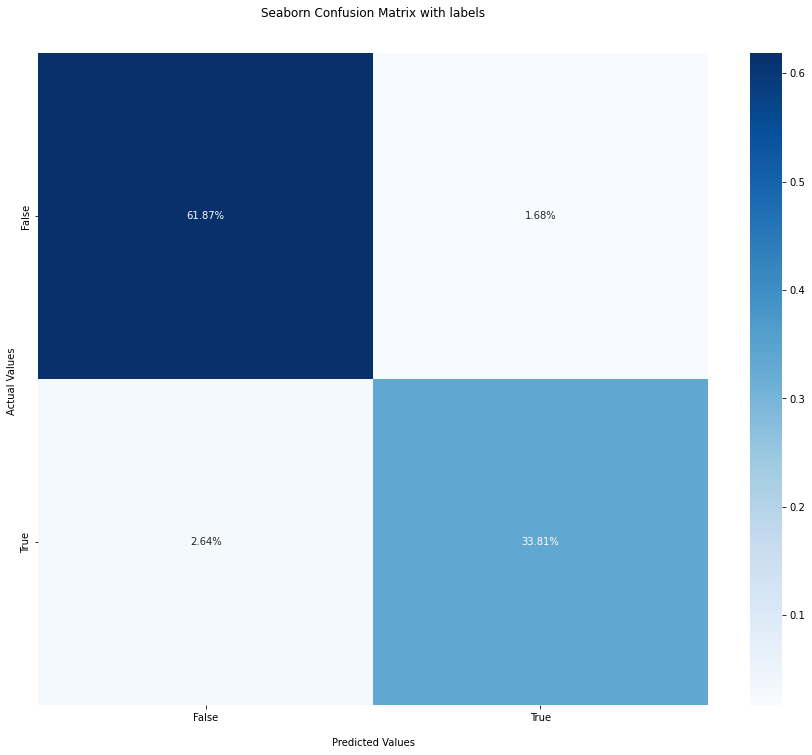

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.show()

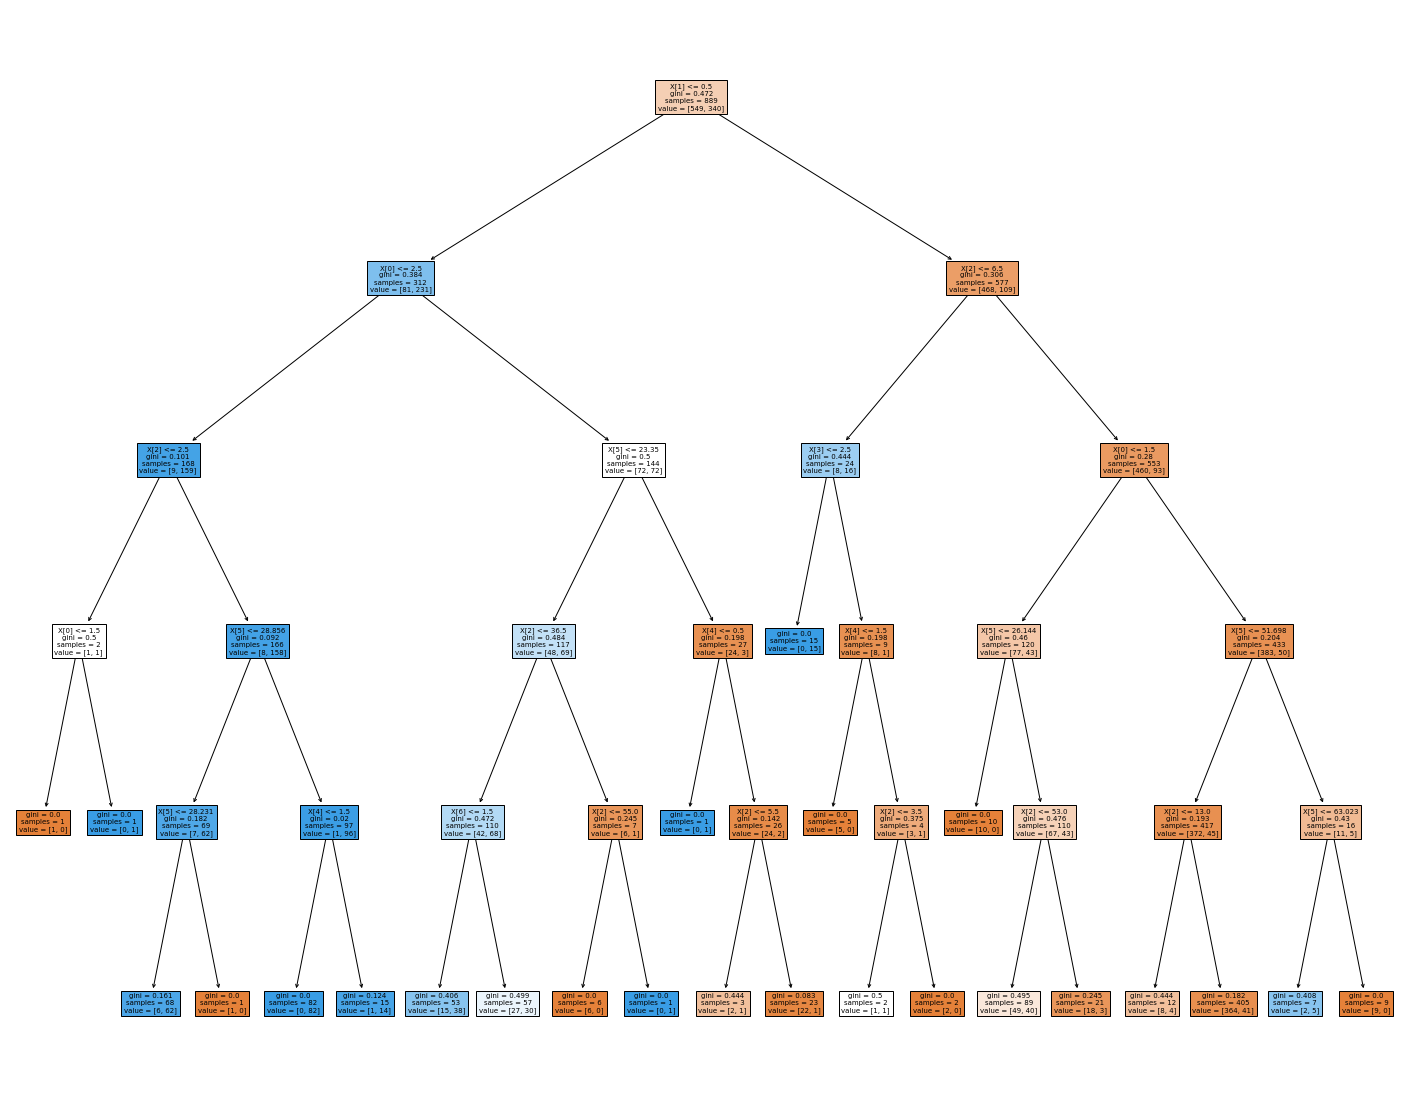

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   
                   filled=True)

In [ ]:
fig.savefig("decision_tree.png")

### Modelo 2 Decision Tree

In [ ]:
start_time = datetime.now()
clf = DecisionTreeClassifier(criterion = "entropy",max_depth = 5,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end_time = datetime.now()

tiempo = end_time-start_time

print(classification_report(y_test, y_pred))
print(tiempo)

Accuracy: 0.9280575539568345
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       265
           1       0.89      0.92      0.90       152

    accuracy                           0.93       417
   macro avg       0.92      0.93      0.92       417
weighted avg       0.93      0.93      0.93       417

0:00:00.040392


In [ ]:
confusion_matrix(y_test, y_pred)

array([[247,  18],
       [ 12, 140]])

# Random Forest

### Modelo 1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8920863309352518


In [ ]:
confusion_matrix(y_test, y_pred)

array([[256,   9],
       [ 36, 116]])

### Código para encontrar los mejores parámetros de Random Forest

In [ ]:
#forest = RandomForestClassifier(random_state = 1)
#modelF = forest.fit(X_train, y_train)
#y_predF = modelF.predict(X_test)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
  #            min_samples_split = min_samples_split, 
 #            min_samples_leaf = min_samples_leaf)

#gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
               #       n_jobs = -1)
#bestF = gridF.fit(X_train, y_train)

In [ ]:
#bestF.best_params_

### Modelo 2 Random Forest

In [ ]:
start_time = datetime.now()
clf=RandomForestClassifier(max_depth = 5,min_samples_leaf =2, min_samples_split=15, n_estimators=100,random_state=5,max_features = 4)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end_time = datetime.now()

tiempo = end_time-start_time

print(classification_report(y_test, y_pred))
print(tiempo)

Accuracy: 0.9232613908872902
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       265
           1       0.93      0.85      0.89       152

    accuracy                           0.92       417
   macro avg       0.93      0.91      0.92       417
weighted avg       0.92      0.92      0.92       417

0:00:00.733005


Random Forest Important features

In [ ]:
names = list(X_test.columns)
feature_imp = pd.Series(clf.feature_importances_,index=names).sort_values(ascending=False)
feature_imp

Sex         0.513144
Fare        0.161509
Pclass      0.146457
Age         0.104232
SibSp       0.042091
Embarked    0.016680
Parch       0.015887
dtype: float64

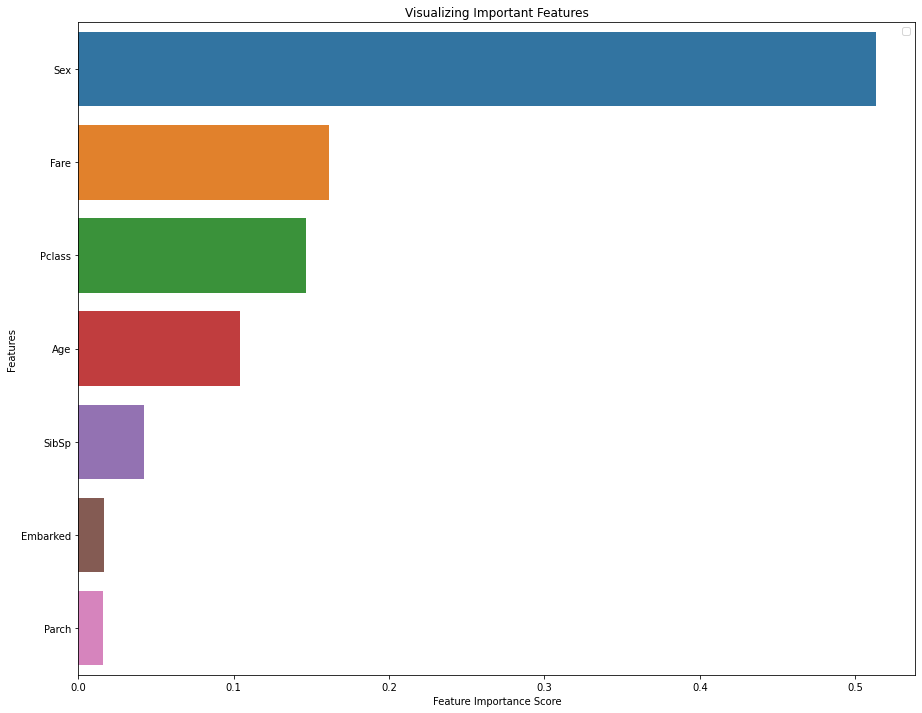

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Modelo 3 Random Forest

In [ ]:
X_test_1 = X_test.drop(['Embarked','Parch'], axis = 1)
X_train_1 = X_train.drop(['Embarked','Parch'], axis = 1)

In [ ]:
clf=RandomForestClassifier(max_depth = 5,min_samples_leaf =2, min_samples_split=15, n_estimators=100,random_state=5,max_features = 4)

clf.fit(X_train_1,y_train)

y_pred=clf.predict(X_test_1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9136690647482014


# Red Neuronal

In [ ]:
from tensorflow import keras

start_time = datetime.now()
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(7,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=150,batch_size=18)
predict=model.predict(X_test)

end_time = datetime.now()

tiempo = end_time-start_time

print(tiempo)

Epoch 1/150
50/50 [==============================] - 1s 2ms/step - loss: 0.7252 - accuracy: 0.6569
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6704
Epoch 3/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6794
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.6997
Epoch 5/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7098
Epoch 6/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.6974
Epoch 7/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7177
Epoch 8/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7120
Epoch 9/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7255
Epoch 10/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7210
Epoch 11/